# CSE 6367 Programming Assignment 1 (P1)

Parth Lahane
1001912459


## Spring 2023

## Due: 11:59pm Central Time, Friday, March 17, 2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as Img
import matplotlib.colors as clr
import math
import cv2
import random
#if running on colab use this
from google.colab.patches import cv2_imshow
#or use this for jupyter notebook
# from cv2 import imshow
from scipy.ndimage import convolve

### Task 1 (10 points) 

Import the "colors.png" image and convert the image to HSV

change the value/brightness value in the HSV image to 50%, convert the HSV back to RGB, and display the result.

In [ ]:
def loadImage(path):
  img = cv2.imread(path)
  return img
def displayImage(img_list, c = None):
  fig = plt.figure(figsize=(16, 16))
  n = len(img_list)
  row = n//2
  if row < 1:
    row = 1
  col = 2
  for i in range(len(img_list)):
    fig.add_subplot(row, col,i+1)
    plt.imshow(img_list[i], cmap = c)
def convertColor(img, mode = "RGB"):
  if mode == "RGB":
    new_img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
  elif mode == "HSV":
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  else:
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    new_img = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return new_img

After Reducing Brightness


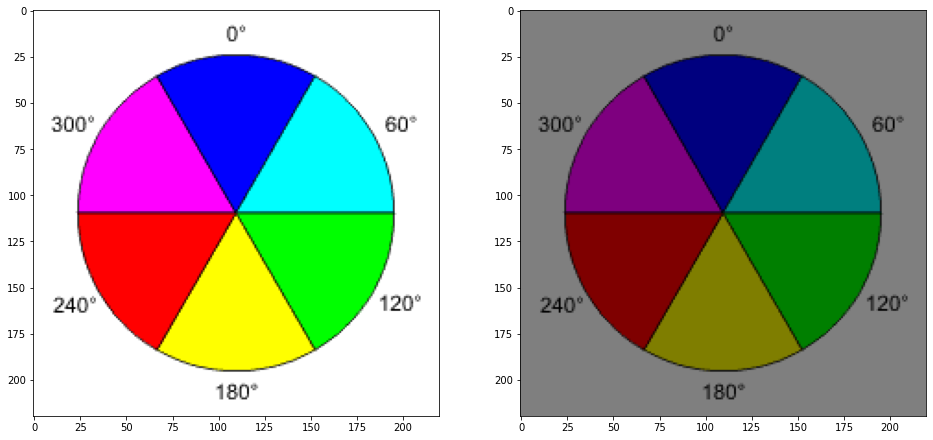

In [ ]:
brightness_divisor = 2
color_image = loadImage("./Images/color.png")
cnv_hsv = convertColor(color_image, "HSV")
cnv_hsv[:,:,2] = np.divide(cnv_hsv[:,:,2], brightness_divisor)
cnv_rgb = convertColor(cnv_hsv, "RGB")
print("After Reducing Brightness")
displayImage([color_image, cnv_rgb])

### Task 2 (20 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

    a) Flip the image left-right
    b) Rotate the image by 45 degree
    c) Resize the image as 200 X 200 image

Display the original image with a, b, c images in a 2X2 grid

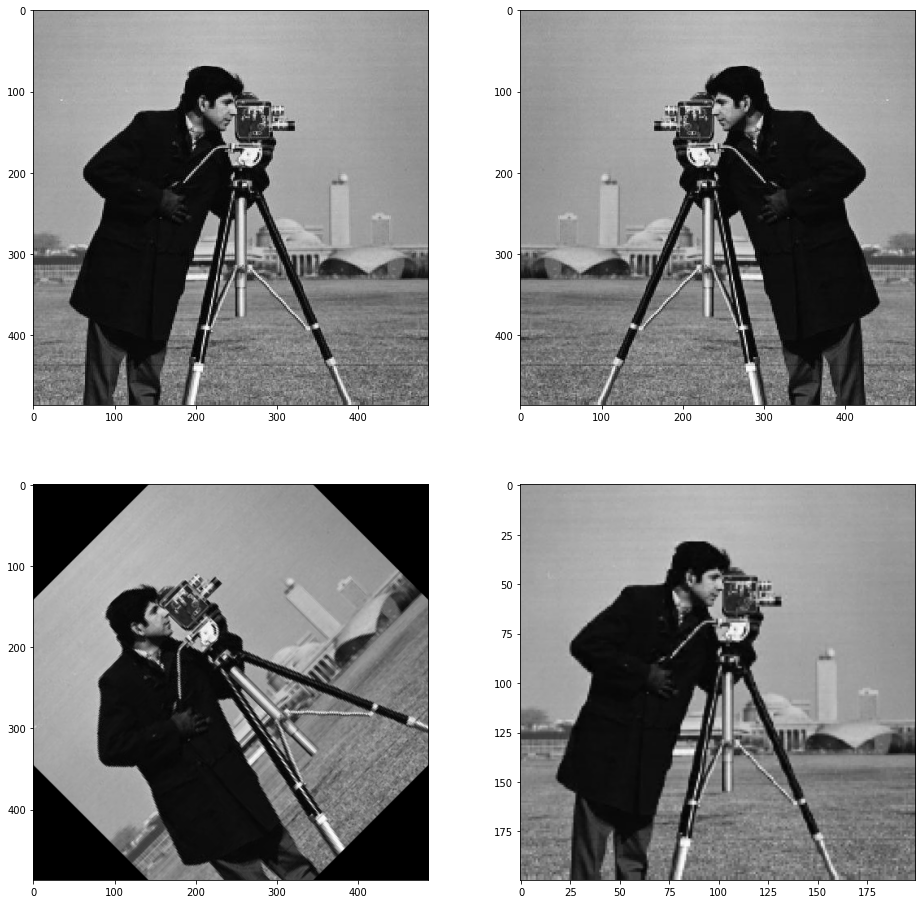

In [ ]:
camera_image = loadImage("./Images/cameraman.jpeg")
h, w = camera_image.shape[:2]
flipped_image = np.flip(camera_image,1)
r_matrix = cv2.getRotationMatrix2D(center = (h/2, w/2), angle = 45, scale = 1)
rotated_image = cv2.warpAffine(src = camera_image, M = r_matrix, dsize=(w, h))
resized_image = cv2.resize(camera_image, (200, 200), interpolation= cv2.INTER_LINEAR)
displayImage([camera_image, flipped_image, rotated_image, resized_image])

### Task3 (10 points)

Binarization : Image binarization converts an image to an image with only two levels (usually 0 and 1 or black and white).

Import the "zebra.jpeg" image, convert to grayscale and apply binarization on the image with threshold = 127 or 0.5 



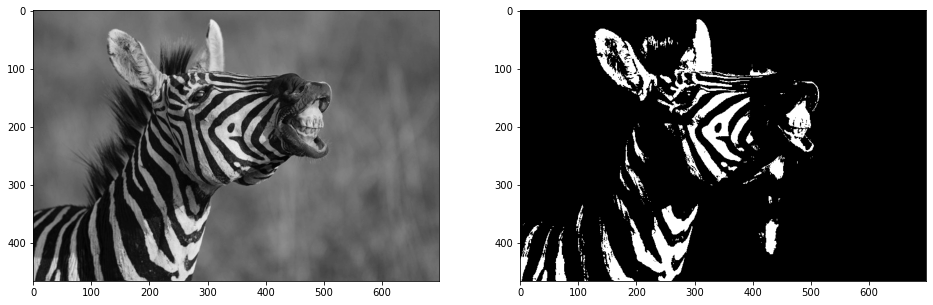

In [ ]:
zebra_img = loadImage("./Images/zebra.jpeg")
gray_zebra_img = convertColor(zebra_img, "gray")
binarised_image = np.where(gray_zebra_img>127,1,0)
displayImage([gray_zebra_img, binarised_image], 'gray')

### Task 4 (20 points) 
Average Filtering

    a) Import the "cameraman.jpeg"
    b) perform average filtering with kernel size 3X3, 5X5 and 9X9. 

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 2X2 grid. 

In [ ]:
def convolveImages(kernel,original_image):
  kernel_sum=abs(np.sum(kernel))
  kernel= kernel/kernel_sum if kernel_sum else kernel
  filtered_image = convolve(original_image, kernel)
  return filtered_image

In [ ]:
def createAverageKernel(size):
  kernel = np.ones((size,size))/(size*size)
  return kernel

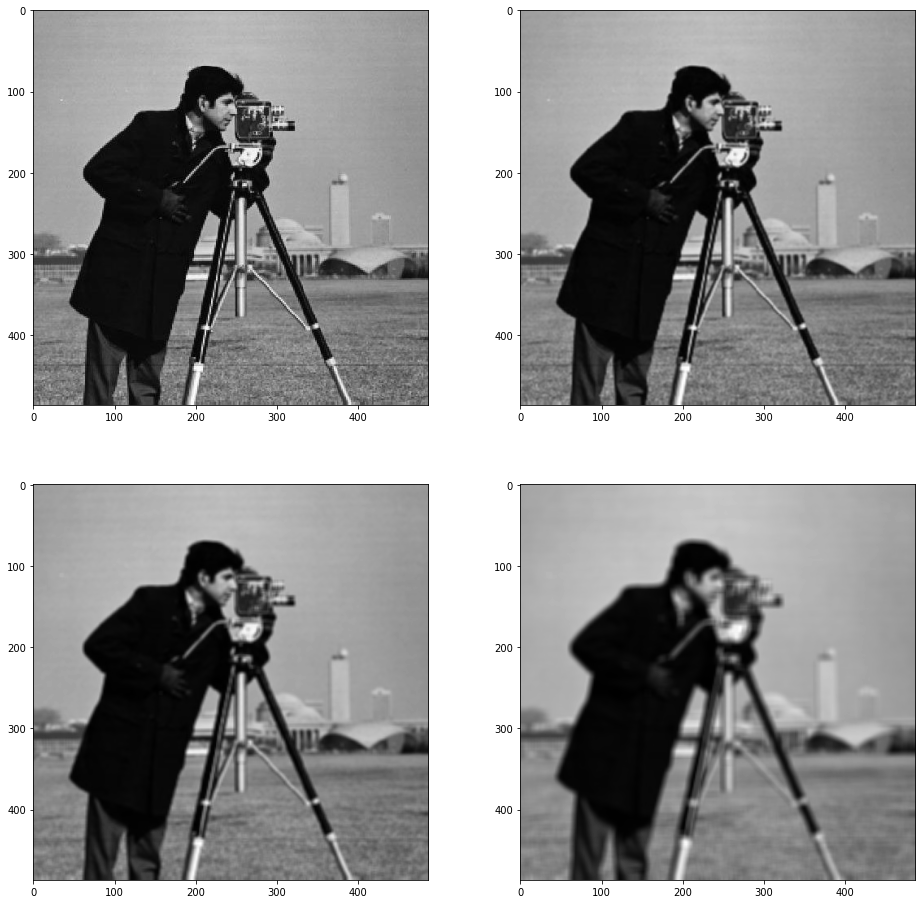

In [ ]:
camera_img = loadImage("./Images/cameraman.jpeg")
camera_img = convertColor(camera_img, "gray")
k_list = [3, 5, 9]
img_list = [camera_img]
for i in k_list:
  k = createAverageKernel(i)
  img_list.append(convolveImages(k,camera_img))
displayImage(img_list, "gray")

### Task 5 (20 points)

Median Filtering

    a) Add salt and pepper noise as 30% of all pixels in "cameraman.jpeg" image
    b) Perform median filtering with kernel size 3X3, 5X5 and 9X9. 
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 2X2 grid. 

In [ ]:
def saltPepperNoise(img):
    row , col = img.shape
    n_row, n_col = int(row*0.3), int(col*0.3)
    number_of_pixels = n_row*n_col
    new_img = np.copy(img)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        if i % 2 == 0:
          new_img[y_coord][x_coord] = 255
        else:
          new_img[y_coord][x_coord] = 0    
    return new_img

In [ ]:
def medianFilter(img, kernel_size):
  new_img = np.copy(img)
  kernel = np.zeros((kernel_size, kernel_size))
  padded_img = np.zeros((new_img.shape[0]+kernel_size-1, new_img.shape[1]+kernel_size-1))
  for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
      padded_img[i+np.int((kernel_size-1)/2), j+np.int((kernel_size-1)/2)] = new_img[i, j]
  for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
      window = padded_img[i:i+kernel_size, j:j+kernel_size]
      K_med = np.median(window)
      new_img[i, j] = K_med
  return new_img

<ipython-input-116-f8ede8c136ab>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_img[i+np.int((kernel_size-1)/2), j+np.int((kernel_size-1)/2)] = new_img[i, j]


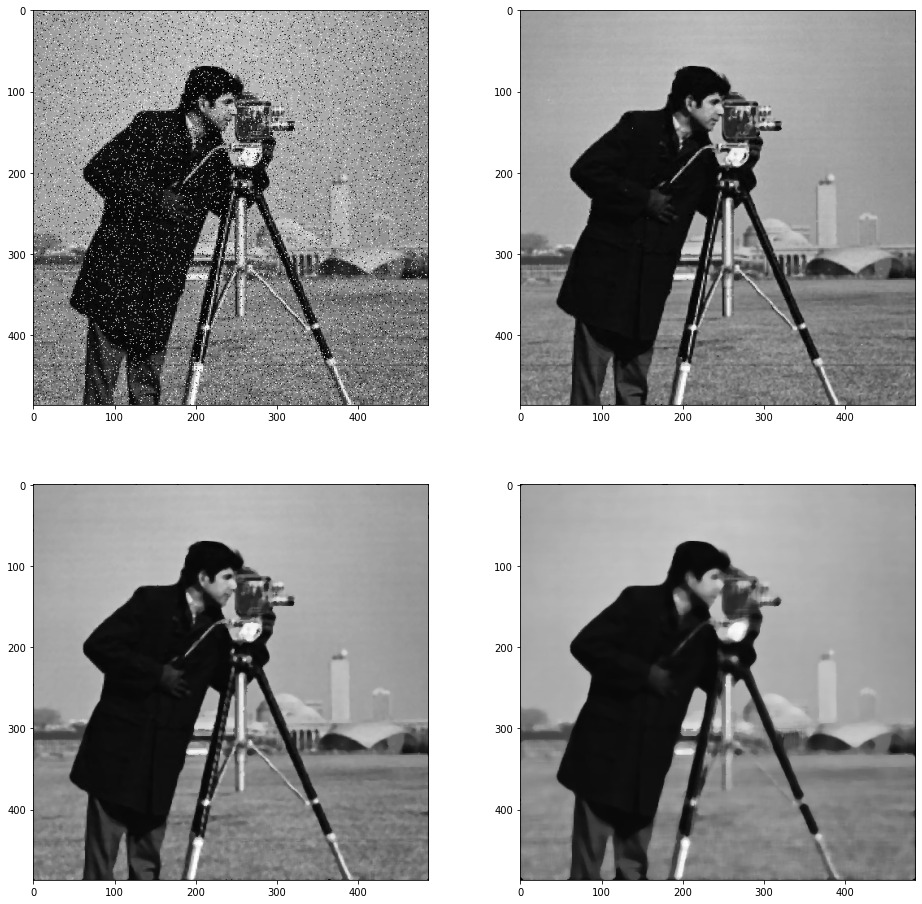

In [ ]:
camera_img = loadImage("./Images/cameraman.jpeg")
gray_img = convertColor(camera_img, "gray")
noise_img = saltPepperNoise(gray_img)
img_list = [noise_img]
k_list = [3, 5, 9]
for i in k_list:
  filtered_image = medianFilter(noise_img, i)
  img_list.append(filtered_image)
displayImage(img_list, "gray")

### Task 6 (20 points)
Sobel Edge Detection

    a) Apply horizontal and vertical sobel filters on the "cameraman.jpeg" image.
    b) Display the Sobel magnitude image

In [ ]:
gx = [[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]
gy = [[1, 2, 1],[0, 0, 0],[-1, -2, -1]]

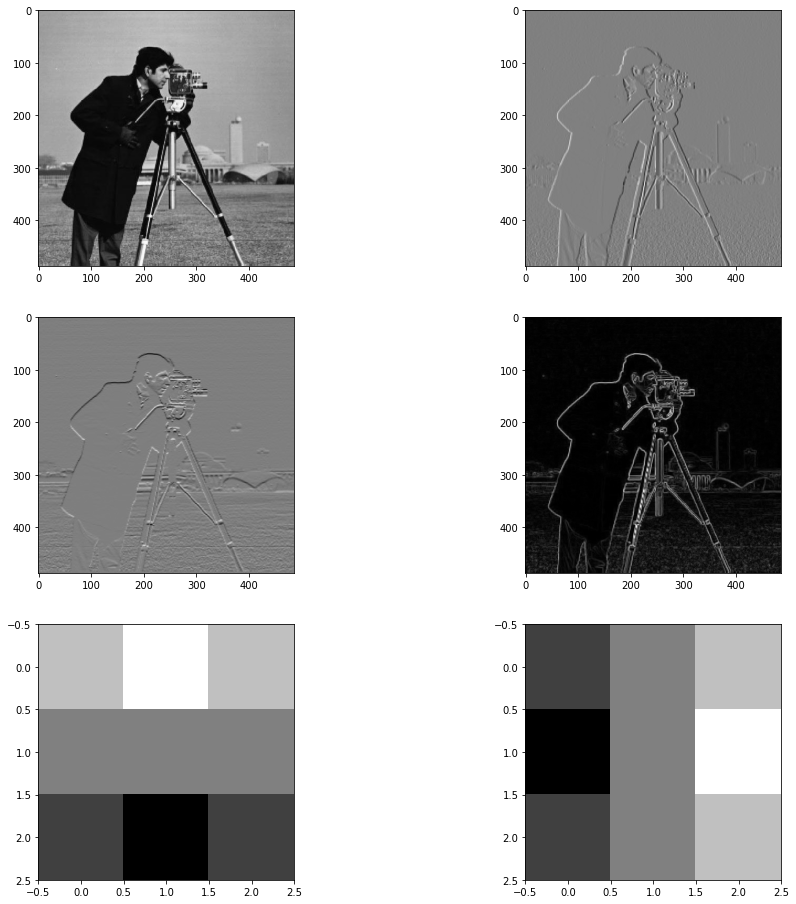

In [ ]:
camera_img = loadImage("./Images/cameraman.jpeg")
camera_img = convertColor(camera_img, "gray")
img_list = [camera_img]
vertical_filtered = convolveImages(gx,camera_img)
horizontal_filtered = convolveImages(gy,camera_img)
double_filtered = np.array(list(map(lambda x, y : (x**2+y**2)**0.5, vertical_filtered, horizontal_filtered)))
img_list.append(vertical_filtered)
img_list.append(horizontal_filtered)
img_list.append(double_filtered)
img_list.append(np.array([[ 1., 2, 1],[0, 0, 0],[-1, -2, -1]]))
img_list.append(np.array([[ -1., 0, 1],[-2, 0, 2],[-1, 0, 1]]))
displayImage(img_list, "gray")

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
